<a href="https://colab.research.google.com/github/AldoBustamanteMartinez2014030169/Compiladores-2021B/blob/main/segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/content/costo.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  (m, b, rank, s) = numpy.linalg.lstsq(matriz, y)


Caracteristica 12 [1, -0.3802445034519389, -0.8212297088102202, -0.9506810194816089, -1.2611786879885003, -1.0198581447613335, -1.372740821840991, 0.3994416762895664]
Patron:  [2]


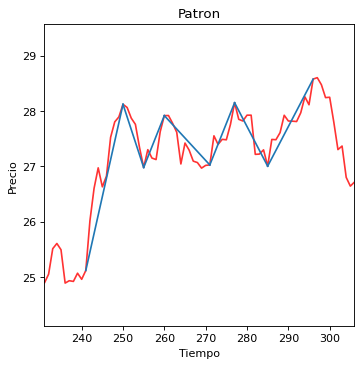

Caracteristica 33 [-1, -1.6635409144196929, -1.2417200164284665, -0.4347331886039581, -0.7950382271340866, -1.1018056497902438, -1.5633389726843199, -0.39746289007388735]
Patron:  [0]


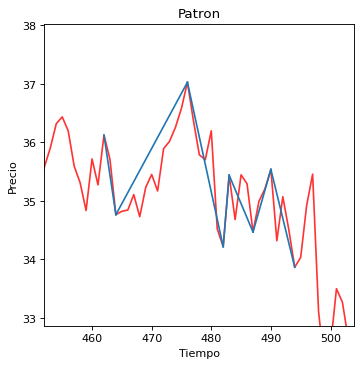

Caracteristica 60 [1, -0.495722243298111, -0.793401379370839, -0.46257160266881603, -1.4827123002557707, -0.9160451805801574, -2.1333990766606212, 0.5355333067072704]
Patron:  [2]


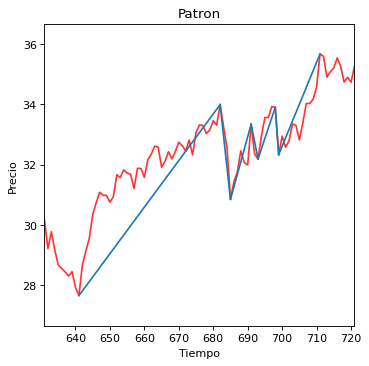

Caracteristica 76 [1, -0.46987918662569006, -1.5940181094326626, -0.9624667157820002, -1.0933145626584033, -0.35668877114779163, -1.355360206628288, 0.9497896577600918]
Patron:  [2]


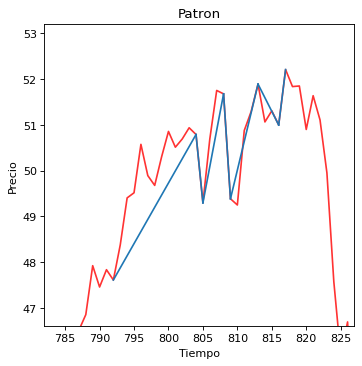

Caracteristica 177 [-1, -1.8124983309611766, -0.7523520464653785, -1.1708350104208591, -1.03202743632823, -0.8206930772960219, -2.7184854653666557, -1.062702116747777]
Patron:  [0]


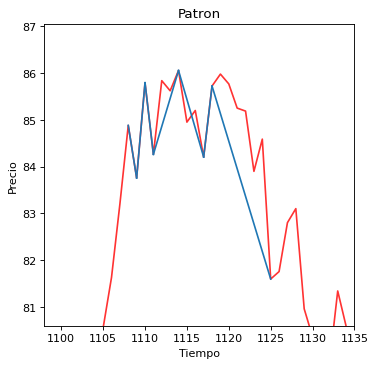

Caracteristica 194 [1, -0.4177057309189597, -0.9761210340840466, -0.6131504732104324, -0.5935161242780252, -0.6302507767840719, -3.5066626666666805, 0.2940301316552795]
Patron:  [2]


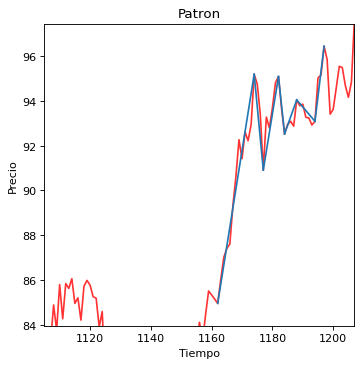

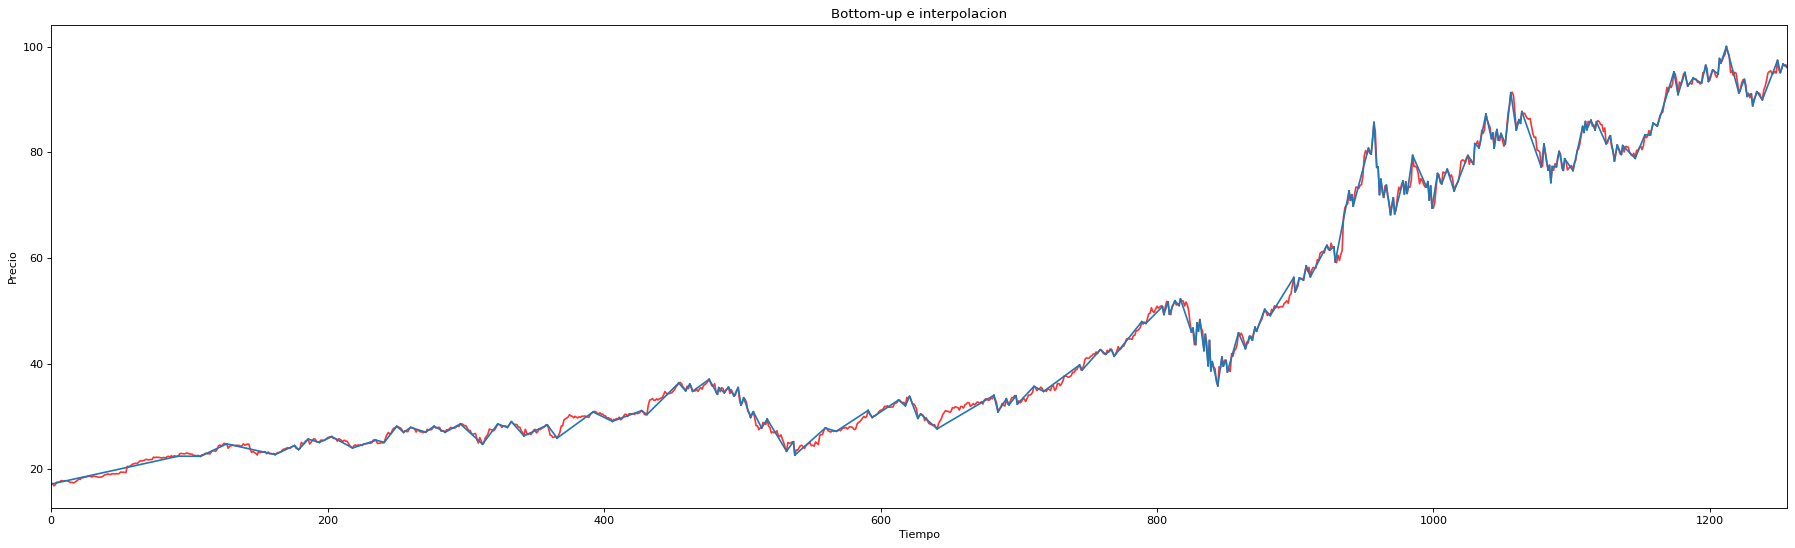

In [2]:
from matplotlib.pylab import gca, figure, plot, subplot, title, xlabel, ylabel, xlim, show, ylim
from matplotlib.lines import Line2D
import segmento
import crear
import extraer
import pandas as pd                    #Almacenamiento y análisis de datos 
import numpy as np
import joblib
from tensorflow import keras

def obtenerDatos(ruta):
    #Lectura de datos
    try:
        datos = pd.read_csv(ruta)
    except:
        print("No se pude abrir el archivo")
        return -1
    
    #Convierte fecha en marca de tiempo
    datos.index = datos["Date"].apply(lambda x: pd.Timestamp(x))
    #Remplaza la marca de tiempo como los indices de la matriz
    datos.drop("Date", axis=1, inplace=True)
    
    #print(datos)
    
    #devuelve una matriz con los datos
    return datos

def draw_plot_gral(datos, titulo):
    plot(range(len(datos)), datos, alpha=0.8, color='red')
    title(titulo)
    xlabel("Tiempo")
    ylabel("Precio")
    xlim(0, len(datos) - 1)

def draw_plot(datos, titulo, xlimite1, xlimite2, ylimite1, ylimite2):
    plot(range(len(datos)), datos, alpha=0.8, color='red')
    title(titulo)
    xlabel("Tiempo")
    ylabel("Precio")
    #xlim(0, len(datos) - 1)
    xlim(xlimite1, xlimite2)
    ylim(ylimite1, ylimite2)

def draw_segments(segmentos):
    ax = gca()
    for segment in segmentos:
        line = Line2D((segment[0],segment[2]),(segment[1],segment[3]))
        ax.add_line(line)

# Abrir el archivo con los precios de amazon
datos = obtenerDatos('apple_5a.csv')
error_max = 1
desde = 0
hasta = len(datos['Close'])

# Parametrizar valores de los precios de 0 a 100
indice = 0
valor_max = max(datos['Close'])

for dato in datos['Close']:
    datos['Close'][indice] = (100*dato)/valor_max
    indice = indice + 1

#print(datos['Close'])


#Obtener grafica simplificada
segmentos = segmento.bottomup(datos['Close'][desde:hasta], error_max)

#Obtener proporciones
caracteristicas = extraer.proporciones(segmentos)

#Buscar patron
datos2 = datos['Close']
precio_cierre = datos2.tolist()
modelo = joblib.load('modelo_entrenado.pkl')
for c in range(len(caracteristicas)):
  entradas = caracteristicas[c]
  patron = modelo.predict([entradas])
  clase = np.argmax(patron, axis = 1)
  if clase != 3:
    print("Caracteristica", c, caracteristicas[c])
    print("Patron: ", clase) #0:descendente, 1:lateral, 2:ascendente, 3:complemento

    #Graficar patron
    xlimite1 = precio_cierre.index(segmentos[c][1])
    #print("Xlimite1: ", xlimite1)
    xlimite2 = precio_cierre.index(segmentos[c+7][1])
    #print("Xlimite2: ", xlimite2)
    y_valores = [segmentos[c][1], segmentos[c+1][1], segmentos[c+2][1], segmentos[c+3][1], segmentos[c+4][1], segmentos[c+5][1], segmentos[c+6][1], segmentos[c+7][1]]
    y_valores = np.asarray(y_valores)
    #print("Y_valores: ", y_valores)
    ind1 = np.unravel_index(np.argmin(y_valores, axis=None), y_valores.shape)
    #print("Ylimite1: ", y_valores[ind1])
    ind2 = np.unravel_index(np.argmax(y_valores, axis=None), y_valores.shape)
    #print("Ylimite2: ", y_valores[ind2])

    figure(figsize=(5, 5), dpi=80)
    draw_plot(datos['Close'][desde:hasta], "Patron", xlimite1-10, xlimite2+10, y_valores[ind1]-1, y_valores[ind2]+1)
    draw_segments(segmentos[c:c+7])
    show()

#Graficar precios
figure(figsize=(28, 8), dpi=80)
draw_plot_gral(datos['Close'][desde:hasta], "Bottom-up e interpolacion")
draw_segments(segmentos)
show()